In [39]:
import glob
import yaml


def round_util(util) -> float:
    if util < 0.525:
        return 0.5
    elif 0.525 <= util < 0.575:
        return 0.55
    elif 0.575 <= util < 0.625:
        return 0.6
    elif 0.625 <= util < 0.675:
        return 0.65
    elif 0.675 <= util < 0.725:
        return 0.7
    elif 0.725 <= util < 0.775:
        return 0.75
    elif 0.775 <= util < 0.825:
        return 0.8
    elif 0.825 <= util < 0.875:
        return 0.85
    elif 0.875 <= util < 0.925:
        return 0.9
    elif 0.925 <= util < 0.975:
        return 0.95
    elif 0.975 <= util:
        return 1.0


proposed_util_ar_map = {}
rm_util_ar_map = {}
greedy_util_ar_map = {}

utils = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

for util in utils:
    proposed_util_ar_map[util] = {'num_schedulable': 0, 'num_total': 0}
    rm_util_ar_map[util] = {'num_schedulable': 0, 'num_total': 0}
    greedy_util_ar_map[util] = {'num_schedulable': 0, 'num_total': 0}


def get_result_map(path: str) -> dict:
    if 'proposed' in path:
        return proposed_util_ar_map
    elif 'rm' in path:
        return rm_util_ar_map
    elif 'greedy' in path:
        return greedy_util_ar_map


for yaml_file in glob.glob('/home/atsushi/2024_RTSS_WiP_Evaluation/outputs/*.yaml'):
    with open(yaml_file, 'r') as f:
        data = yaml.safe_load(f)

    if data['missed_job_id'] == 0:
        continue

    result_map = get_result_map(yaml_file)
    util = round_util(float(data['total_utilization']) / float(data['num_cores']))
    if data['missed_job_id'] == '2147483647':
        result_map[util]['num_schedulable'] += 1
    result_map[util]['num_total'] += 1


def calc_acceptance_ratio(result_map: dict) -> dict:
    for util in utils:
        result_map[util] = float(result_map[util]['num_schedulable']
                                 ) / float(result_map[util]['num_total'])
    return result_map


proposed_util_ar_map = calc_acceptance_ratio(proposed_util_ar_map)
rm_util_ar_map = calc_acceptance_ratio(rm_util_ar_map)
greedy_util_ar_map = calc_acceptance_ratio(greedy_util_ar_map)

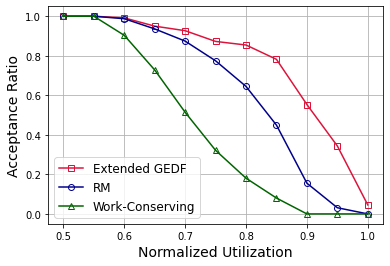

In [40]:
import matplotlib.pyplot as plt

# グラフを描画
plt.plot(utils, list(proposed_util_ar_map.values()), label='Extended GEDF',
         marker='s', markersize=6, markerfacecolor='none', color='crimson')
plt.plot(utils, list(rm_util_ar_map.values()), label='RM', marker='o',
         markersize=6, markerfacecolor='none', color='darkblue')
plt.plot(utils, list(greedy_util_ar_map.values()), label='Work-Conserving',
         marker='^', markersize=6, markerfacecolor='none', color='darkgreen')

# グラフのタイトルとラベルを設定
plt.xlabel('Normalized Utilization', fontsize=14)
plt.ylabel('Acceptance Ratio', fontsize=14)

# 凡例を追加
plt.legend(fontsize=12)

# グラフを表示
plt.grid(True)
plt.savefig('acceptance_ratio.pdf')